In [13]:
from mdp import *
import numpy as np
import matplotlib.pyplot as plt

### Approximate Q learning: Linear Q-function

In [18]:
# defining a linear Q function class
class LinearQ(QFunction):

    def __init__(self, mdp, features):
        self.mdp = mdp
        self.features = features
        # initialize weights to zero
        num_weights = self.features.get_num_actions() * self.features.get_num_features() 
        self.weights = np.zeros(shape=(num_weights)) 

        # initialize value table
        self.V = {}
        for state in (self.mdp.states):
            self.V[state] = 0.0

    # update the weights
    def update(self, state, action, old, delta):
        # extract features from state
        feature_values = np.array(self.features.extract(state, action))

        #print(f"state: {state}, action: {action}")
        #print(f"features values: {feature_values}")
        #print(f"delta: {delta}")

        # update weights
        self.weights = self.weights + delta * feature_values


    # evaluate q function
    def evaluate(self, state, action):
        # extract features from state
        feature_values = np.array(self.features.extract(state, action))
        #print("feature values: ",feature_values)
        #print("weights: ",self.weights)
        # compute Q value
        Q = np.dot(feature_values, self.weights)
        return Q


    def evaluate_V(self, state):
        return self.V[state]

    def update_V_from_Q(self):
        for state in self.mdp.states:
            actions = self.mdp.get_actions(state)
            self.V[state] =  max([self.evaluate(state, action) for action in actions])



# defining a feature extractor class for gridworld problem (hand-engineered features)
class GridWorldFeatures:
    def __init__(self, mdp):
        self.mdp = mdp
        self.num_features = 5
        

    def get_num_features(self):
        return self.num_features    
 
 
    def get_num_actions(self):
        return len(self.mdp.get_actions())


    '''
        We will define five features:
        1) normalized x-distance from goal
        2) normalized y-distance from goal
        3) normalized manhattan distance from goal
        4) if we are in same row as goal (boolean- 1 or 0)
        5) if we are in same column as goal (boolean- 1 or 0)
    '''
    def extract(self, state, action):
        (xg, yg) = self.mdp.goal
        (x, y) = state

        feature_values = []
        for a in self.mdp.get_actions():
            if (a == action) and (state != self.mdp.exit):
                feature_values.append(abs(x-xg)/self.mdp.width)
                feature_values.append(abs(y-yg)/self.mdp.height)
                feature_values.append((abs(xg-x)/self.mdp.width) + (abs(yg-y)/self.mdp.height))
                feature_values.append(1 if y==yg else 0) 
                feature_values.append(1 if x==xg else 0) 
            else:
                feature_values += [0.0 for _ in range(self.num_features)]
        
        return feature_values        



Episode# 0, length: 84, accumulated reward: -0.00015926791088519818
-----------------------
 0.00  0.00  0.00 -0.10 
 0.00  0.00  0.00 -0.12 
 0.00  0.00  0.00  0.00 
-----------------------
Episode# 1, length: 42, accumulated reward: 0.013302794647291146
-----------------------
 0.00  0.00  0.00  0.12 
 0.00  0.00  0.00 -0.01 
 0.00  0.00  0.00  0.00 
-----------------------
Episode# 2, length: 62, accumulated reward: -0.0016173092699229906
-----------------------
 0.00  0.00  0.00  0.02 
 0.00  0.00  0.00 -0.13 
 0.00  0.00  0.00  0.00 
-----------------------
Episode# 3, length: 336, accumulated reward: -4.690732447938606e-16
-----------------------
 0.00  0.00  0.00 -0.07 
 0.00  0.00  0.00 -0.24 
 0.00  0.00  0.00  0.00 
-----------------------
Episode# 4, length: 105, accumulated reward: -1.7426933810146188e-05
-----------------------
 0.00  0.00  0.00 -0.14 
 0.00  0.00  0.00 -0.33 
 0.00  0.00  0.00  0.00 
-----------------------
Episode# 5, length: 285, accumulated reward: -1.

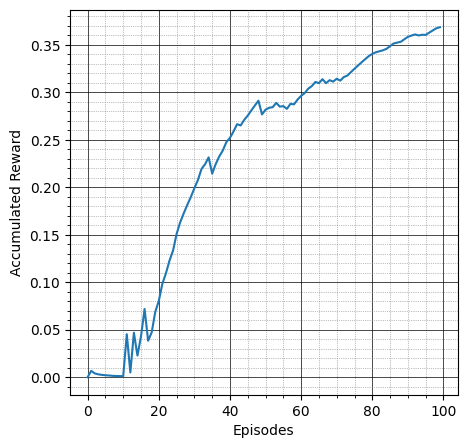

In [28]:
# instantiate grid world mdp
gw = GridWorld(discount_factor=0.9)

# instantiate feature extractor
features = GridWorldFeatures(gw)

# instantiate linear q function object
qfunction = LinearQ(gw, features)

# instantiate Q learner
QL = QLearner(gw, qfunction, epsilon=0.1, alpha=0.1)

# training
episode_rewards = QL.train(episodes=100)

# policy extraction
pi = qfunction.extract_policy(gw)

print("-----------------------")
for y in range(gw.height-1, -1, -1):
    for x in range(gw.width):
        if (x,y) in pi:
            print(f"{pi[(x,y)]:<6}", end=' ')
        else:
            print(f"{'None':<6}", end=' ')
    print("")       
print("-----------------------")

plot_rewards(episode_rewards, window_size=100)


Episode# 0, length: 14, accumulated reward: 0.2541865828329001
-----------------------
 0.00  0.00  0.00  0.60 
 0.00  0.00  0.00  0.30 
 0.00  0.00  0.00  0.00 
-----------------------
Episode# 1, length: 55, accumulated reward: -0.0033813919135227306
-----------------------
 0.05  0.03  0.02  0.21 
 0.08  0.00  0.04 -0.18 
 0.10  0.08  0.07  0.05 
-----------------------
Episode# 2, length: 148, accumulated reward: -1.8777980666473096e-07
-----------------------
 0.00  0.00  0.00 -0.04 
 0.00  0.00  0.00 -0.48 
 0.00  0.00  0.00  0.00 
-----------------------
Episode# 3, length: 40, accumulated reward: -0.016423203268260675
-----------------------
 0.00  0.00  0.00 -0.19 
 0.00  0.00  0.00 -0.67 
 0.00  0.00  0.00  0.00 
-----------------------
Episode# 4, length: 28, accumulated reward: -0.058149737003040096
-----------------------
 0.00  0.00  0.00 -0.29 
 0.00  0.00  0.00 -0.79 
 0.00  0.00 -0.00 -0.00 
-----------------------
Episode# 5, length: 15, accumulated reward: -0.2287679

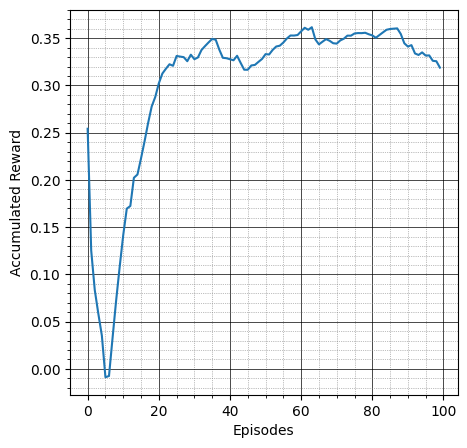

In [29]:
# instantiate grid world mdp
gw2 = GridWorld(discount_factor=0.9)

# instantiate feature extractor
features2 = GridWorldFeatures(gw2)

# instantiate linear q function object
qfunction2 = LinearQ(gw2, features2)

# instantiate Q learner
QL2 = QLearner(gw2, qfunction2, epsilon=0.1, alpha=0.3)

# training with SARSA instead
episode_rewards = QL2.train(episodes=100, SARSA=True)

# policy extraction
pi2 = qfunction2.extract_policy(gw2)

print("-----------------------")
for y in range(gw2.height-1, -1, -1):
    for x in range(gw2.width):
        if (x,y) in pi2:
            print(f"{pi2[(x,y)]:<6}", end=' ')
        else:
            print(f"{'None':<6}", end=' ')
    print("")       
print("-----------------------")

plot_rewards(episode_rewards, window_size=100)


Episode# 0, length: 7, accumulated reward: -3.1572050000000003
-----------------------
-0.01 -0.01 -0.01 -0.01 -0.00 -0.00 
-0.01 -0.01 -0.01 -0.00 -0.00 -0.00 
-0.01 -0.01 -0.01 -0.00 -0.00 -0.00 
-0.01  0.00  0.00  0.00  0.00  0.00 
-----------------------
Episode# 1, length: 75, accumulated reward: -0.5020554915835288
-----------------------
-0.24 -0.21 -0.18 -0.15 -0.12 -0.09 
-0.21 -0.18 -0.15 -0.12 -0.09 -0.06 
-0.18 -0.15 -0.12 -0.09 -0.06 -0.03 
-0.18  0.00  0.00  0.00  0.00  0.00 
-----------------------
Episode# 2, length: 45, accumulated reward: -0.5484886864893764
-----------------------
-0.34 -0.29 -0.25 -0.21 -0.17 -0.13 
-0.29 -0.25 -0.21 -0.17 -0.13 -0.08 
-0.25 -0.21 -0.17 -0.13 -0.08 -0.04 
-0.26  0.00  0.00  0.00  0.00  0.00 
-----------------------
Episode# 3, length: 215, accumulated reward: -0.4999999999103351
-----------------------
-0.48 -0.42 -0.37 -0.30 -0.18 -0.18 
-0.42 -0.36 -0.30 -0.24 -0.16 -0.11 
-0.36 -0.30 -0.24 -0.18 -0.12 -0.05 
-0.34  0.00  0.00  0.

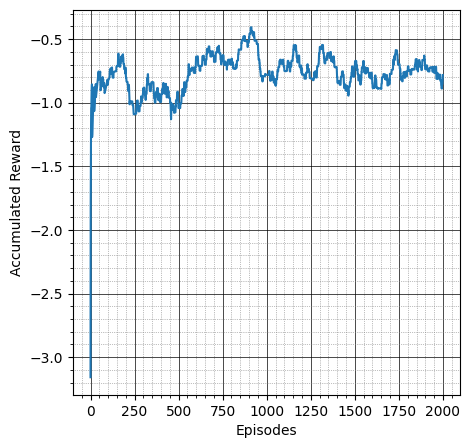

In [27]:
# intantiate cliffworld object
cw = CliffWorld(discount_factor=0.9, noise=0.0)

# instantiate feature extractor
features3 = GridWorldFeatures(cw)

# instantiate linear q function object
qfunction3 = LinearQ(cw, features3)

# instantiate Q learner
QL3 = QLearner(cw, qfunction3, epsilon=0.1, alpha=0.1)


# training
episode_rewards = QL3.train(episodes=2000)

# policy extraction
pi3 = qfunction3.extract_policy(cw)

print("-----------------------")
for y in range(cw.height-1, -1, -1):
    for x in range(cw.width):
        if (x,y) in pi3:
            print(f"{pi3[(x,y)]:<6}", end=' ')
        else:
            print(f"{'None':<6}", end=' ')
    print("")       
print("-----------------------")

plot_rewards(episode_rewards, window_size=100)